# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fritz Elbert Christopel Manambe
- **Email:** manambefritz19@gmail.com
- **ID Dicoding:** fritz_manambe_7R04

## Menentukan Pertanyaan Bisnis

- Bagaimana performa bisnis pada tahun 2011 bila dibandingkan dengan tahun 2012?
- Bagaimana perbandingan antara penggunaan sepeda selama hari kerja dan akhir pekan di setiap jamnya?
- Bagaimana kondisi cuaca mempengaruhi pertimbangan pelanggan untuk melakukan rental sepeda?

## Import Semua Packages/Library yang Digunakan

Pertama, import *library* terlebih dahulu. Library yang akan digunakan untuk pengerjaan proyek ini (khususnya pada notebook ini) adalah:
- *Library* "pandas" untuk mengelola data,
- *Library* "numpy" untuk proses komputasi numerik, dan 
- *Library* "matplotlib" dan "seaborn" untuk visualisasi data.
- *Library* "datetime" untuk mengolah tipe data tanggal dan waktu.

Keempat *library* tersebut di-*assign* menggunakan alias untuk mempermudah pengerjaan proyek. Secara berturut-turut, alias yang digunakan adalah "pd", "np", "plt" (untuk submodul "pyplot"), "sns", dan "dt".

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

Pada tahap awal *Data Wrangling* (*Gathering Data*), simpan dataset yang akan digunakan ke dalam objek berbentuk *DataFrame* menggunakan fungsi/*function* "read_csv()" pada modul Pandas.

In [30]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Sebagian besar data yang digunakan pada file CSV merupakan data kontinu.
- Dataset "day.csv" berisi deskripsi terkait kondisi lingkungan dan data rental sepeda yang dicatat setiap harinya. Sedangkan, dataset "hour.csv" berisi perincian lebih lanjut dari data rental sepeda.
- Kolom *instant* berisi nilai unik untuk masing-masing *record*.
- Kolom *dateday* berisi tanggal; kolom *season* berisi representasi musim dalam bentuk angka; kolom yr, mnth, hr, berturut-turut merepresentasikan tahun, bulan, dan jam pada hari tersebut.
- Kolom *holiday* berisi nilai 1 untuk hari libur, dan 0 untuk selain hari libur.
- Kolom *weekday* berisi representasi hari dalam bentuk angka (0: Minggu, 1: Senin, ..., 6: Sabtu).
- Kolom *workingday* diisi dengan nilai 1 untuk "hari kerja", dan 0 untuk bukan "hari kerja" (akhir pekan, libur, dan sebagainya).
- Kolom *temp* dan *atemp* berisi nilai hasil normalisasi bacaan suhu -- dalam derajat celsius -- pada saat itu (*atemp* untuk suhu yang dirasakan).
- Kolom *hum* berisi tingkat kelembapan udara.
- Kolom *windspeed* berisi kecepatan udara.
- Kolom *casual* berisi jumlah pengguna kasual (tidak terdaftar). Sedangkan, kolom *registered* untuk pengguna terdaftar.
- Kolom *cnt* untuk total jumlah pengguna layanan rental sepeda.

### Assessing Data

#### Menilai tabel `day_df`

Proses *Assessing Data* yang pertama dilakukan untuk *DataFrame* "*day_df*". Gunakan *method* ".info()" pada *DataFrame* untuk mendapatkan informasi terkait *DataFrame* yang digunakan. Informasi tersebut meliputi:
- Tipe/*class* dari objek *DataFrame* yang digunakan.
- *Range* dari *index* yang ada pada *DataFrame*.
- Jumlah kolom pada *DataFrame*.
- Nama kolom, jumlah data tak-kosong (*not-null*), dan tipe data yang digunakan pada kolom tersebut.
- Rangkuman jumlah dari masing-masing tipe data yang digunakan.
- Penggunaan memori.

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kolom yang menggunakan tipe data yang tidak sesuai, yaitu pada kolom *dteday*. Perbaikan akan dilakukan pada tahap *Cleaning Data*.

Selanjutnya, periksa apakah terdapat duplikat menggunakan *method* "dupliated()* yang kemudian dijumlahkan menggunakan *method* "sum()" untuk mendapatkan total jumlah baris/*record* yang terduplikasi.

In [33]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Didapatkan jumlah duplikasi 0, yang berarti tidak ada duplikasi pada *DataFrame* yang digunakan.

Lanjutkan dengan menggunakan *method* ".describe()" untuk menampilkan deskripsi data secara statistik, yang meliputi: jumlah data pada kolom; nilai rata-rata; *standard deviation*; nilai minimum; kuartil 25%, 50%, dan 75%; serta nilai maksimum.

In [34]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

Lakukan hal yang serupa pada *DataFrame* "hour_df". Pertama, diawali dengan menggunakan *method* "info()" pada *DataFrame*.

In [35]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti pada *DataFrame* sebelumnya, terdapat ketidaksesuaian dalam penggunaan tipe data dan domain kolom.

Lanjutkan dengan memeriksa duplikasi data.

In [36]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi data pada *DataFrame*. Lanjutkan dengan menggunakan *method* "describe()" untuk melihat deskripsi data secara statistik.

In [37]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Nilai rerata untuk kolom *season* adalah +- 2.5, yang berarti rata-rata pengguna menggunakan layanan rental sepeda di antara musim panas dan musim gugur.
- Nilai rerata +- 6.5 pada kolom *mnth* menunjukkan bahwa rata-rata pengguna memanfaatkan layanan rental sepeda di antara bulan Juni hingga Juli.
- Rata-rata pengguna menggunakan layanan rental sepeda pada siang hari.
- Sebagian besar pengguna me-rental sepeda pada hari kerja, yang ditandai dengan *standard deviation* yang rendah pada kolom *holiday*, di angka 0.16. Ditandai juga dengan nilai *mean* dan *std* yang signifikan pada kolom *workingday*.
- Rata-rata pengguna memanfaatkan layanan ini pada hari Rabu, ditandai dengan nilai 3 sebagai *mean* pada kolom *weekday*.
- Cuaca cerah, suhu yang hangat, serta kelembapan yang cukup menjadi salah satu pertimbangan dalam me-rental sepeda.
- Pelanggan rental sepeda didominasi oleh pengguna terdaftar.

### Cleaning Data

Ganti tipe data pada kolom *dteday* dari *object* menjadi *datetime* menggunakan fungsi "to_datetime()" pada kedua *DataFrame*.

In [38]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [39]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Sekarang, tipe data untuk kolom *dteday* pada kedua *DataFrame* telah diubah menjadi tipe data *datetime* yang sesuai untuk pengolahan data bertipe tanggal & waktu.
- Kini, data telah siap untuk dieksplor lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore day_df

Mengeksplorasi performa bisnis dengan menjumlahkan total pelanggan setiap bulannya.

Diawali dengan mengumpulkan data total pelanggan setiap bulannya pada tahun 2011, yang ditandai dengan nilai 0 pada kolom "*yr*".

In [122]:
monthly_performance_2011 = day_df[day_df.yr == 0].groupby('mnth')['cnt'].sum()
monthly_performance_2011

mnth
1      38189
2      48215
3      64045
4      94870
5     135821
6     143512
7     141341
8     136691
9     127418
10    123511
11    102167
12     87323
Name: cnt, dtype: int64

Mengumpulkan data total pelanggan setiap bulannya pada tahun 2012. Ditandai dengan nilai 1 pada field "*yr*".

In [123]:
monthly_performance_2012 = day_df[day_df.yr == 1].groupby('mnth')['cnt'].sum()
monthly_performance_2012

mnth
1      96744
2     103137
3     164875
4     174224
5     195865
6     202830
7     203607
8     214503
9     218573
10    198841
11    152664
12    123713
Name: cnt, dtype: int64

Mengeksplorasi performa bisnis dengan menjumlahkan total pelanggan setiap minggunya.

In [129]:
# Menambahkan kolom baru untuk menyimpaan nilai minggu dalam angka
day_df['week'] = day_df['dteday'].dt.isocalendar().week

In [131]:
# Performa mingguan tahun 2011
weekly_performance_2011 = day_df[day_df.yr == 0].groupby('week')['cnt'].sum()
weekly_performance_2011

week
1      9408
2      9025
3      8770
4      7699
5     10273
6     11192
7     14692
8     12113
9     11742
10    13045
11    17865
12    15165
13    15402
14    17680
15    18476
16    24676
17    29661
18    29573
19    30278
20    31893
21    32646
22    32582
23    31709
24    33565
25    33640
26    35226
27    34186
28    34533
29    27393
30    30099
31    30206
32    31375
33    30779
34    29435
35    34162
36    23834
37    31465
38    30155
39    28045
40    33522
41    28911
42    28930
43    23132
44    27518
45    26434
46    24126
47    17364
48    25160
49    19985
50    23029
51    16855
52    14474
Name: cnt, dtype: int64

In [132]:
# Performa mingguan tahun 2012
weekly_performance_2012 = day_df[day_df.yr == 0].groupby('week')['cnt'].sum()
weekly_performance_2012

week
1      9408
2      9025
3      8770
4      7699
5     10273
6     11192
7     14692
8     12113
9     11742
10    13045
11    17865
12    15165
13    15402
14    17680
15    18476
16    24676
17    29661
18    29573
19    30278
20    31893
21    32646
22    32582
23    31709
24    33565
25    33640
26    35226
27    34186
28    34533
29    27393
30    30099
31    30206
32    31375
33    30779
34    29435
35    34162
36    23834
37    31465
38    30155
39    28045
40    33522
41    28911
42    28930
43    23132
44    27518
45    26434
46    24126
47    17364
48    25160
49    19985
50    23029
51    16855
52    14474
Name: cnt, dtype: int64

Mengeksplorasi korelasi antara kolom "*cnt*" dengan kolom lainnya untuk melihat apakah terdapat kolom yang berkolerasi negatif dengan kolom "*cnt*". Hasil yang didapat kemudian diurutkan dari nilai tertinggi.

In [ ]:
cnt_correlation = day_df.corr()['cnt'].sort_values(ascending=False)
cnt_correlation

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
dteday        0.628830
temp          0.627494
year          0.566710
yr            0.566710
season        0.406100
mnth          0.279977
week          0.261642
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

### Explore hour_df

Mengeksploasi *DataFrame* "hour_df" dengan mengelompokkan jumlah pelanggan berdasarkan waktu (jam) penyewaan sepeda, dan hari penyewaan (apakah dilakukan pada hari kerja/*workingday*, atau akhir pekan/*weekend*)

In [165]:
# Group by hour and working day, summing the counts
hourly_performance = hour_df.groupby(['hr', 'workingday'])['cnt'].sum().unstack()
hourly_performance

workingday,0,1
hr,,
0,20884,18246
1,15987,8177
2,12123,4229
3,5851,2323
4,1876,2552
5,1929,12332
6,4292,50840
7,10027,144144
8,24406,236595


**Insight:**
- Pada tahun 2011, terjadi peningkatan jumlah pelanggan pada bulan ke-5 (bulan Mei) hinga bulan ke-11 (bulan November) mencapai kisaran ratusan ribu pelanggan perbulannya.
- Peningkatan yang lebih pesat terjadi di tahun berikutnya (tahun 2012), yang dimana, jumlah pelanggan terus menyentuh angka ratusan ribu sejak bulan ke-2 (bulan Februari) hingga mencapai puncaknya pada bulan ke-9 (bulan September), di angka 218573 pelanggan.
- Kolom *holiday*, *hum*, *windspeed*, dan *weathersit* berkorelasi secara negatif terhadap kolom *cnt* yang mengindikasikan bahwa adanya dampak dari perubahan cuaca atas keputusan pelanggan untuk menyewa sepeda pada hari tersebut.
- Tampak perbedaan yang signifikan pada jam-jam tertentu ketika membandingkan antara hari kerja dan akhir pekan, contohnya pada jam 7 hingga jam 9 yang memiliki jumlah pelanggan lebih tinggi pada akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa bisnis pada tahun 2011 bila dibandingkan dengan tahun 2012?

Visualisasi plot performa bulanan pada tahun 2011 menggunakan linechart.

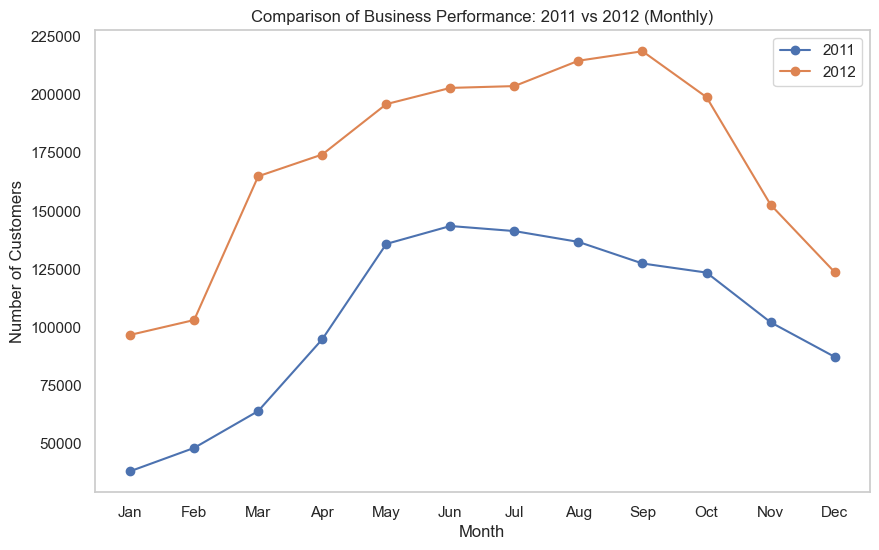

In [191]:
plt.figure(figsize=(10, 6))

# Membuat plot perbandingan antara performa bulanan pada tahun 2011 dan 2012
plt.plot(monthly_performance_2011.index, monthly_performance_2011.values, marker='o', label='2011')
plt.plot(monthly_performance_2012.index, monthly_performance_2012.values, marker='o', label='2012')

# Menambahkan judul dan label pada diagram
plt.title('Comparison of Business Performance: 2011 vs 2012 (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set month labels
plt.legend()
plt.grid()
plt.show()

Visualisasi plot performa mingguan pada tahun 2012 menggunakan linechart.

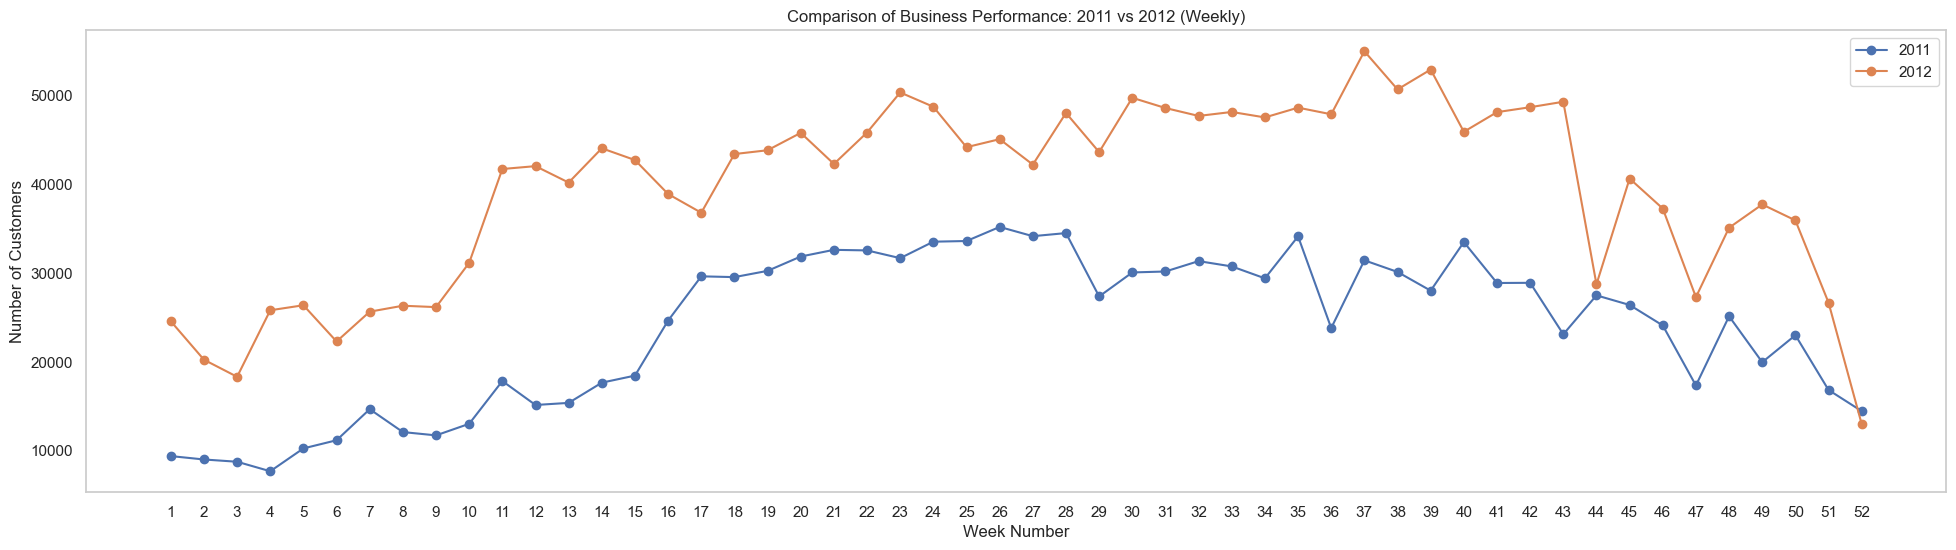

In [190]:
# Create a line chart for comparison
plt.figure(figsize=(24, 6))

# Plotting both years
plt.plot(weekly_performance_2011.index, weekly_performance_2011.values, marker='o', label='2011')
plt.plot(weekly_performance_2012.index, weekly_performance_2012.values, marker='o', label='2012')

# Adding labels and title
plt.title('Comparison of Business Performance: 2011 vs 2012 (Weekly)')
plt.xlabel('Week Number')
plt.ylabel('Number of Customers')

# Set week numbers from 1 to 52 as x-ticks
plt.xticks(ticks=range(1, 53), labels=list(range(1, 53)))

plt.legend()
plt.grid()
plt.show()


### Pertanyaan 2: Bagaimana perbandingan antara penggunaan sepeda selama hari kerja dan akhir pekan di setiap jamnya?

Visualisasi perbandingan jumlah pelanggan antara hari kerja dengan hari libur di setiap jamnya.

<Figure size 1200x600 with 0 Axes>

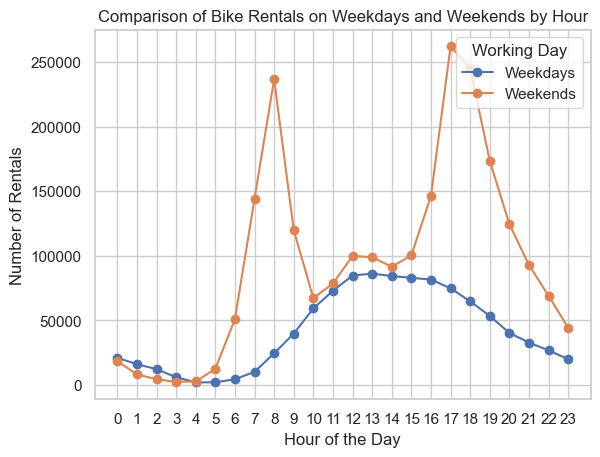

In [189]:
# Set plot size
plt.figure(figsize=(12, 6))

# Plot the data
hourly_performance.plot(kind='line', marker='o')

# Adding title and labels
plt.title('Comparison of Bike Rentals on Weekdays and Weekends by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.xticks(range(len(hourly_performance)))
plt.grid()
plt.legend(['Weekdays', 'Weekends'], title='Working Day', loc='upper right')
plt.show()


### Pertanyaan 3: Bagaimana kondisi cuaca mempengaruhi pertimbangan pelanggan untuk melakukan rental sepeda?

Visualisasi plot regresi untuk menampilkan korelasi antara kolom *humidity* (kelembapan) dan *cnt* (Jumlah pelanggan)

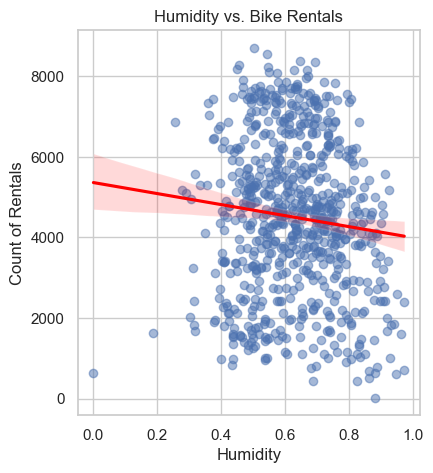

In [158]:
# Menetapkan style yang digunakan pada plot
sns.set(style="whitegrid")

# Ukuran dari plot
plt.figure(figsize=(15, 5))

# Plot korelasi antara kolom humidity (hum) dan kolom count (cnt)
plt.subplot(1, 3, 1)
sns.regplot(x='hum', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Humidity vs. Bike Rentals')
plt.xlabel('Humidity')
plt.ylabel('Count of Rentals')

plt.show()


Visualisasi plot regresi untuk menampilkan korelasi antara kolom *windspeed* (kecepatan angin) dan *cnt* (Jumlah pelanggan)

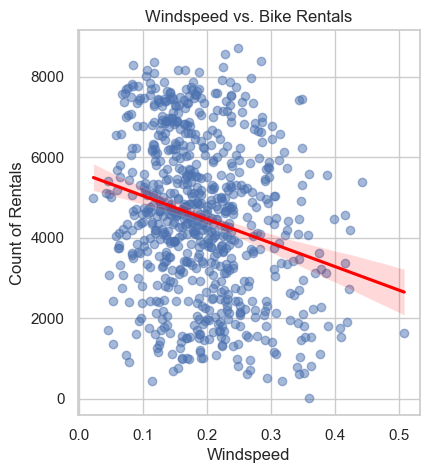

In [159]:
# Ukuran dari plot
plt.figure(figsize=(15, 5))

# Plot korelasi antara kolom Windspeed (windspeed) dan kolom count (cnt) 
plt.subplot(1, 3, 2)
sns.regplot(x='windspeed', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Windspeed vs. Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Count of Rentals')

plt.show()

Visualisasi plot regresi untuk menampilkan korelasi antara kolom *weathersit* (kondisi cuaca) dan *cnt* (Jumlah pelanggan)

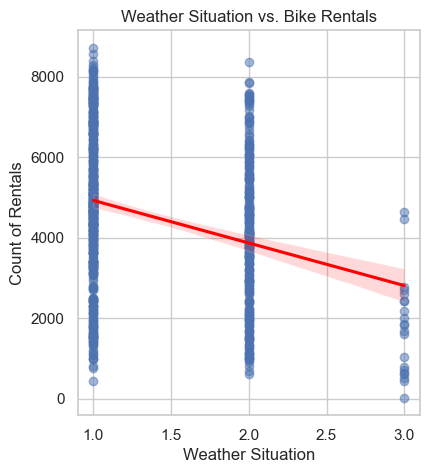

In [160]:
# Ukuran dari plot
plt.figure(figsize=(15, 5))

# Plot korelasi antara kolom Weather Situation (weathersit) dan kolom count (cnt)
plt.subplot(1, 3, 3)
sns.regplot(x='weathersit', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Weather Situation vs. Bike Rentals')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Rentals')

plt.show()

**Insight:**
- *Linechart* performa bulanan secara jelas menampilkan bahwa terdapat perbedaan yang signifikan pada jumlah pelanggan pada tahun 2012 dibandingkan dengan tahun 2011. Keduanya mengalami peningkatan pada 3-4 bulan pertama, dan secara fluktuatif bertahan hingga bulan Sep-Okt yang kemudian mengalami penurunan. Fluktuasinya dapat dilihat dengan lebih jelas pada *linechart* performa mingguan.
- Hasil visualisasi menunjukkan adanya perbedaan yang sangat signifikan antara jumlah pelanggan rental sepeda pada hari kerja dibandingkan dengan akhir pekan. Meskipun keduanya mengikuti tren yang sama, yaitu terjadi peningkatan dari pagi hingga sore, jumlah pelanggan meningkat dengan pesat di pagi hari dan sore hari pada akhir pekan.
- Ketiga visualisasi *regression plot* menampilkan secara jelas bahwa adanya hubungan/korelasi yang negatif antara jumlah pelanggan dengan situasi cuaca, kelembapan, dan kecepatan angin.

## Analisis Lanjutan (Opsional)

## Conclusion

- Jumlah pelanggan pada tahun 2012 mengalami peningkatan yang signifikan dibandingkan dengan jumlah pelanggan pada tahun 2011. Meskipun begitu, keduanya mengikuti pola yang sama, yaitu terjadi peningkatan pada bulan April hingga bulan September sebelum mengalami penurunan kembali. Jumlah penggunaan yang fluktuatif juga menunjukkan performa bisnis yang cukup baik.
- Meskipun mengikuti tren yang sama, terdapat perbedaan yang signifikan antara jumlah pelanggan pada pagi hari dan sore hari di akhir pekan. Hal ini menunjukkan bahwa akhir pekan turut berkontribusi dalam peningkatan jumlah pelanggan.
- Dalam melakukan penyewaan sepeda, pelanggan turut mempertimbangkan faktor keadaan iklim atau cuaca. Hal ini dapat dilihat melalui visualisasi *regplot* yang menunjukkan bahwa semakin tinggi nilai kelembapan, kecepatan angin, dan semakin buruk cuaca, mempengaruhi jumlah pelanggan.